# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

In [52]:
df = pd.read_csv('hasil_clustering.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [54]:
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [55]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 2009
Jumlah data uji: 503


In [57]:
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()

    all_values = pd.concat([X_train[column], X_test[column]]).unique()
    le.fit(all_values)
    X_train[column] = le.transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1758, 11), y_train=(1758,)
Test set shape: X_test=(754, 11), y_test=(754,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [59]:
datetime_columns = X_train.select_dtypes(include=['object']).columns[X_train.select_dtypes(include=['object']).columns.str.contains('Date|Time', case=False)]

for column in datetime_columns:
    X_train[column] = pd.to_numeric(pd.to_datetime(X_train[column], errors='coerce'))
    X_test[column] = pd.to_numeric(pd.to_datetime(X_test[column], errors='coerce'))

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)
knn = KNeighborsClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


KNN adalah algoritma lazy learning yang bekerja berdasarkan prinsip kesamaan (similarity) antara data. Algoritma ini mengklasifikasikan sebuah data baru berdasarkan kedekatannya dengan K tetangga terdekat dalam dataset pelatihan.


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [60]:
def evaluate_model_multiclass(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def learning_curve_clustering(X, n_clusters=3):

    train_sizes = np.linspace(0.1, 1.0, 5) * X.shape[0]
    train_sizes = train_sizes.astype(int)

    silhouette_scores = []

    for size in train_sizes:
        X_subset = X[:size]
        model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        labels = model.fit_predict(X_subset)

        if len(set(labels)) > 1:
            score = silhouette_score(X_subset, labels)
        else:
            score = np.nan

        silhouette_scores.append(score)

    # 3. Visualisasi learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, silhouette_scores, 'o-', color="blue", label="Silhouette Score")
    plt.title(f"Learning Curve: KMeans Clustering (k = {n_clusters})")
    plt.xlabel("Training Set Size")
    plt.ylabel("Silhouette Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


for column in datetime_columns:
    X_train[column] = pd.to_datetime(X_train[column], errors='coerce')
    X_test[column] = pd.to_datetime(X_test[column], errors='coerce')

    X_train[column] = X_train[column].astype('int64')
    X_test[column] = X_test[column].astype('int64')

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("📊 Akurasi SVM:", accuracy)
print("\n📄 Classification Report:\n", classification_rep)
print("🧮 Confusion Matrix:\n", cm_svm)


📊 Akurasi SVM: 0.3620689655172414

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53       273
           1       0.00      0.00      0.00       248
           2       0.00      0.00      0.00       233

    accuracy                           0.36       754
   macro avg       0.12      0.33      0.18       754
weighted avg       0.13      0.36      0.19       754

🧮 Confusion Matrix:
 [[273   0   0]
 [248   0   0]
 [233   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the KNN model on scaled data
knn_after_scaling = KNeighborsClassifier().fit(X_train_scaled, y_train)

results = {
    'K-Nearest Neighbors': evaluate_model_multiclass(knn, X_test, y_test),
    'K-Nearest Neighbors after scaling': evaluate_model_multiclass(knn_after_scaling, X_test_scaled, y_test), # Use X_test_scaled here
}

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
# Tampilkan DataFrame
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,0.375332,0.376029,0.365102,0.347916
1,K-Nearest Neighbors after scaling,0.761273,0.762551,0.757493,0.758448


==== KNN Classifier ====
Confusion Matrix:
[[148  97  28]
 [120 101  27]
 [120  79  34]]
Accuracy: 0.3753
Precision (macro): 0.3760
Recall (macro): 0.3651
F1-Score (macro): 0.3479

----------------------------------------



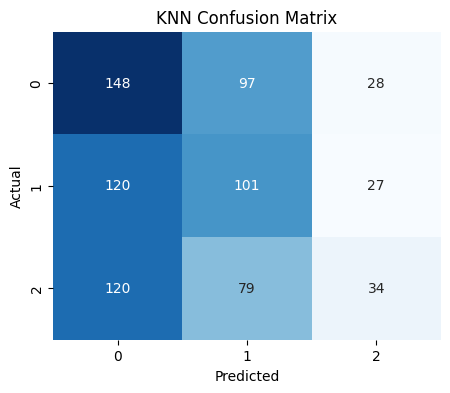

In [64]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)

# Calculate overall accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.4f}")

# Calculate per-class precision, recall, and F1-score
# 'macro' averages the unweighted mean per label
precision = precision_score(y_test, y_pred_knn, average='macro')
recall = recall_score(y_test, y_pred_knn, average='macro')
f1 = f1_score(y_test, y_pred_knn, average='macro')

print(f"Precision (macro): {precision:.4f}")
print(f"Recall (macro): {recall:.4f}")
print(f"F1-Score (macro): {f1:.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [65]:
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

test_report = classification_report(y_test, y_test_pred_best)
print(f"Best Hyperparameters: {best_params}")
print(f"Training Accuracy (Best Model): {train_acc_best:.4f}")
print(f"Test Accuracy (Best Model): {test_acc_best:.4f}")
print("Classification Report on Test Set:\n", test_report)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Training Accuracy (Best Model): 0.8625
Test Accuracy (Best Model): 0.5500
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.56      0.82      0.67        11

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20



## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [66]:
from sklearn.pipeline import Pipeline
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42))
])


knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='uniform'))
])


dt_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [67]:
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,0.375332,0.376029,0.365102,0.347916
1,K-Nearest Neighbors after scaling,0.761273,0.762551,0.757493,0.758448


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.